<a href="https://colab.research.google.com/github/pabloperfer/CUDAexercises/blob/main/optimize_memory_movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numba import vectorize
@vectorize(['float32(float32,float32)'],target='cuda')
def add_ufunc(x,y):
  return x+y

In [2]:
from numba import vectorize
import math
@vectorize(['float32(float32,float32,float32)'],target='cuda')
def make_pulses(i,period,amplitude):
  return max(math.sin(i/period)-0.3,0.0)*amplitude

In [3]:
import numpy as np
from numba import cuda
n=100000
noise=(np.random.normal(size=n)*3).astype(np.float32)
t=np.arange(n,dtype=np.float32)
period = n/23

In [4]:
from numba import cuda
#pulses=make_pulses(t,period,100.0)
#waveform=add_ufunc(pulses,noise)
device_noise = cuda.to_device(noise)
device_t = cuda.to_device(t)
device_pulses = cuda.device_array(shape=(n), dtype=np.float32)
make_pulses(device_t, period, 100.0, out=device_pulses)
waveform = add_ufunc(device_pulses, device_noise)


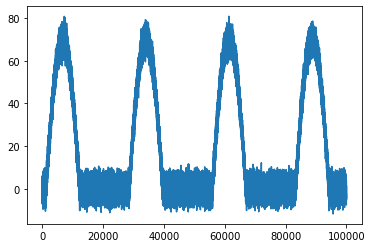

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(waveform)